In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras

In [92]:
df=pd.read_csv('Universities.csv')

In [3]:
df.head(10)

,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,University of Oxford,United Kingdom,20664,11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.4
1,2,California Institute of Technology,United States,2240,6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.5
2,3,University of Cambridge,United Kingdom,18978,10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.4
3,4,Stanford University,United States,16135,7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.3
4,5,Massachusetts Institute of Technology,United States,11247,8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.6
5,6,Princeton University,United States,7983,8.1,0.25,0.45,0.55,90.3,96.3,98.8,58.6,81.1,93.2,93.2
6,7,Harvard University,United States,20823,9.2,0.24,0.49,0.51,89.2,98.6,99.1,47.3,76.3,93.0,93
7,8,Yale University,United States,12402,5.4,0.20,0.50,0.50,92.0,94.8,97.3,52.4,68.7,91.7,91.7
8,9,University of Chicago,United States,13833,5.7,0.28,0.46,0.54,89.1,91.4,96.7,52.7,76.0,90.2,90.2
9,10,Imperial College London,United Kingdom,16760,11.7,0.56,0.38,0.62,84.5,87.6,97.0,69.9,97.1,89.8,89.8


In [93]:
df.columns

Index(['Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

In [5]:
df=df.drop(columns=['Percentage_Male','Overall_Ranking', 'Country'])

In [8]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [15]:
df.head(5)

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4
1,2,2240,6.4,0.30,0.34,92.1,97.2,97.9,88.0,82.5,94.5
2,3,18978,10.9,0.37,0.47,91.4,98.7,95.8,59.3,95.0,94.4
3,4,16135,7.3,0.23,0.43,92.8,96.4,99.9,66.2,79.5,94.3
4,5,11247,8.6,0.34,0.39,90.5,92.4,99.5,86.9,89.0,93.6


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Score_Rank               1396 non-null   int64  
 1   Number_students          1396 non-null   int64  
 2   Numb_students_per_Staff  1396 non-null   float64
 3   International_Students   1396 non-null   float64
 4   Percentage_Female        1396 non-null   float64
 5   Teaching                 1396 non-null   float64
 6   Research                 1396 non-null   float64
 7   Citations                1396 non-null   float64
 8   Industry_Income          1396 non-null   float64
 9   International_Outlook    1396 non-null   float64
 10  Score_Result             1396 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 120.1 KB


In [17]:
df.describe()

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,315.304441,23723.029370,18.966905,0.123424,0.475279,28.229083,23.981160,48.113109,46.477292,47.114542,34.794054
std,140.946223,32826.064794,16.835492,0.383978,0.160516,14.149550,17.537044,27.735626,16.273498,23.288723,16.946075
min,1.000000,558.000000,0.900000,0.000000,0.000000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,10262.000000,12.375000,0.020000,0.410000,18.300000,11.600000,23.375000,35.775000,27.475000,21.000000
50%,336.000000,17832.500000,16.350000,0.080000,0.520000,23.800000,18.000000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,29434.000000,21.900000,0.170000,0.570000,33.600000,30.100000,71.950000,49.825000,62.800000,44.500000
max,535.000000,830104.000000,493.500000,13.770000,1.000000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


In [18]:
#What university has 830K students?

In [19]:
df[df['Number_students']==830104]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
1084,447,830104,493.5,0.01,0.37,13.0,24.1,16.5,100.0,17.3,19.9


In [20]:
#what is the number one university?

In [21]:
df[df['Score_Rank']==1]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4


In [22]:
#What universities are all women?

In [23]:
df[df['Percentage_Female']==1]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
662,323,14510,16.9,0.15,1.0,29.9,30.8,31.4,69.9,46.7,32.9
1190,472,2775,14.8,0.04,1.0,23.3,12.7,13.0,37.8,23.9,17.4
1267,491,10110,22.5,0.01,1.0,18.1,9.9,16.8,36.8,15.2,15.5


In [24]:
#What about industry income?

In [25]:
df[df['Industry_Income']==100]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
22,22,38783,12.0,0.11,0.34,86.6,94.0,74.6,100.0,47.4,82.6
31,30,34519,34.7,0.17,0.61,68.4,77.0,88.8,100.0,67.2,77.8
42,37,40472,47.8,0.27,0.34,64.6,70.4,85.5,100.0,72.9,74.1
58,50,13914,21.3,0.27,0.53,49.3,57.1,96.1,100.0,81.9,69.4
85,69,21475,42.8,0.23,0.54,49.1,51.6,83.1,100.0,75.7,63.3
107,84,33427,10.7,0.22,0.23,66.0,64.7,50.6,100.0,61.8,61.5
195,130,28521,26.3,0.08,0.56,31.2,43.2,78.8,100.0,73.7,54.0
363,217,3651,9.5,0.26,0.55,27.7,32.9,54.0,100.0,95.4,44.0
479,262,6489,10.8,0.24,0.31,37.5,36.1,33.6,100.0,63.7,39.4
757,356,34825,23.0,0.04,0.34,25.2,28.0,30.2,100.0,26.8,29.5


In [ ]:
df=df.drop(columns=['University'])

In [26]:
df.isnull().sum()

Score_Rank                 0
Number_students            0
Numb_students_per_Staff    0
International_Students     0
Percentage_Female          0
Teaching                   0
Research                   0
Citations                  0
Industry_Income            0
International_Outlook      0
Score_Result               0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
#no rows are duplicated

In [ ]:
#histogram loop for the features

array([[<AxesSubplot:title={'center':'Score_Rank'}>,
        <AxesSubplot:title={'center':'Number_students'}>,
        <AxesSubplot:title={'center':'Numb_students_per_Staff'}>],
       [<AxesSubplot:title={'center':'International_Students'}>,
        <AxesSubplot:title={'center':'Percentage_Female'}>,
        <AxesSubplot:title={'center':'Teaching'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Citations'}>,
        <AxesSubplot:title={'center':'Industry_Income'}>],
       [<AxesSubplot:title={'center':'International_Outlook'}>,
        <AxesSubplot:title={'center':'Score_Result'}>, <AxesSubplot:>]],
      dtype=object)

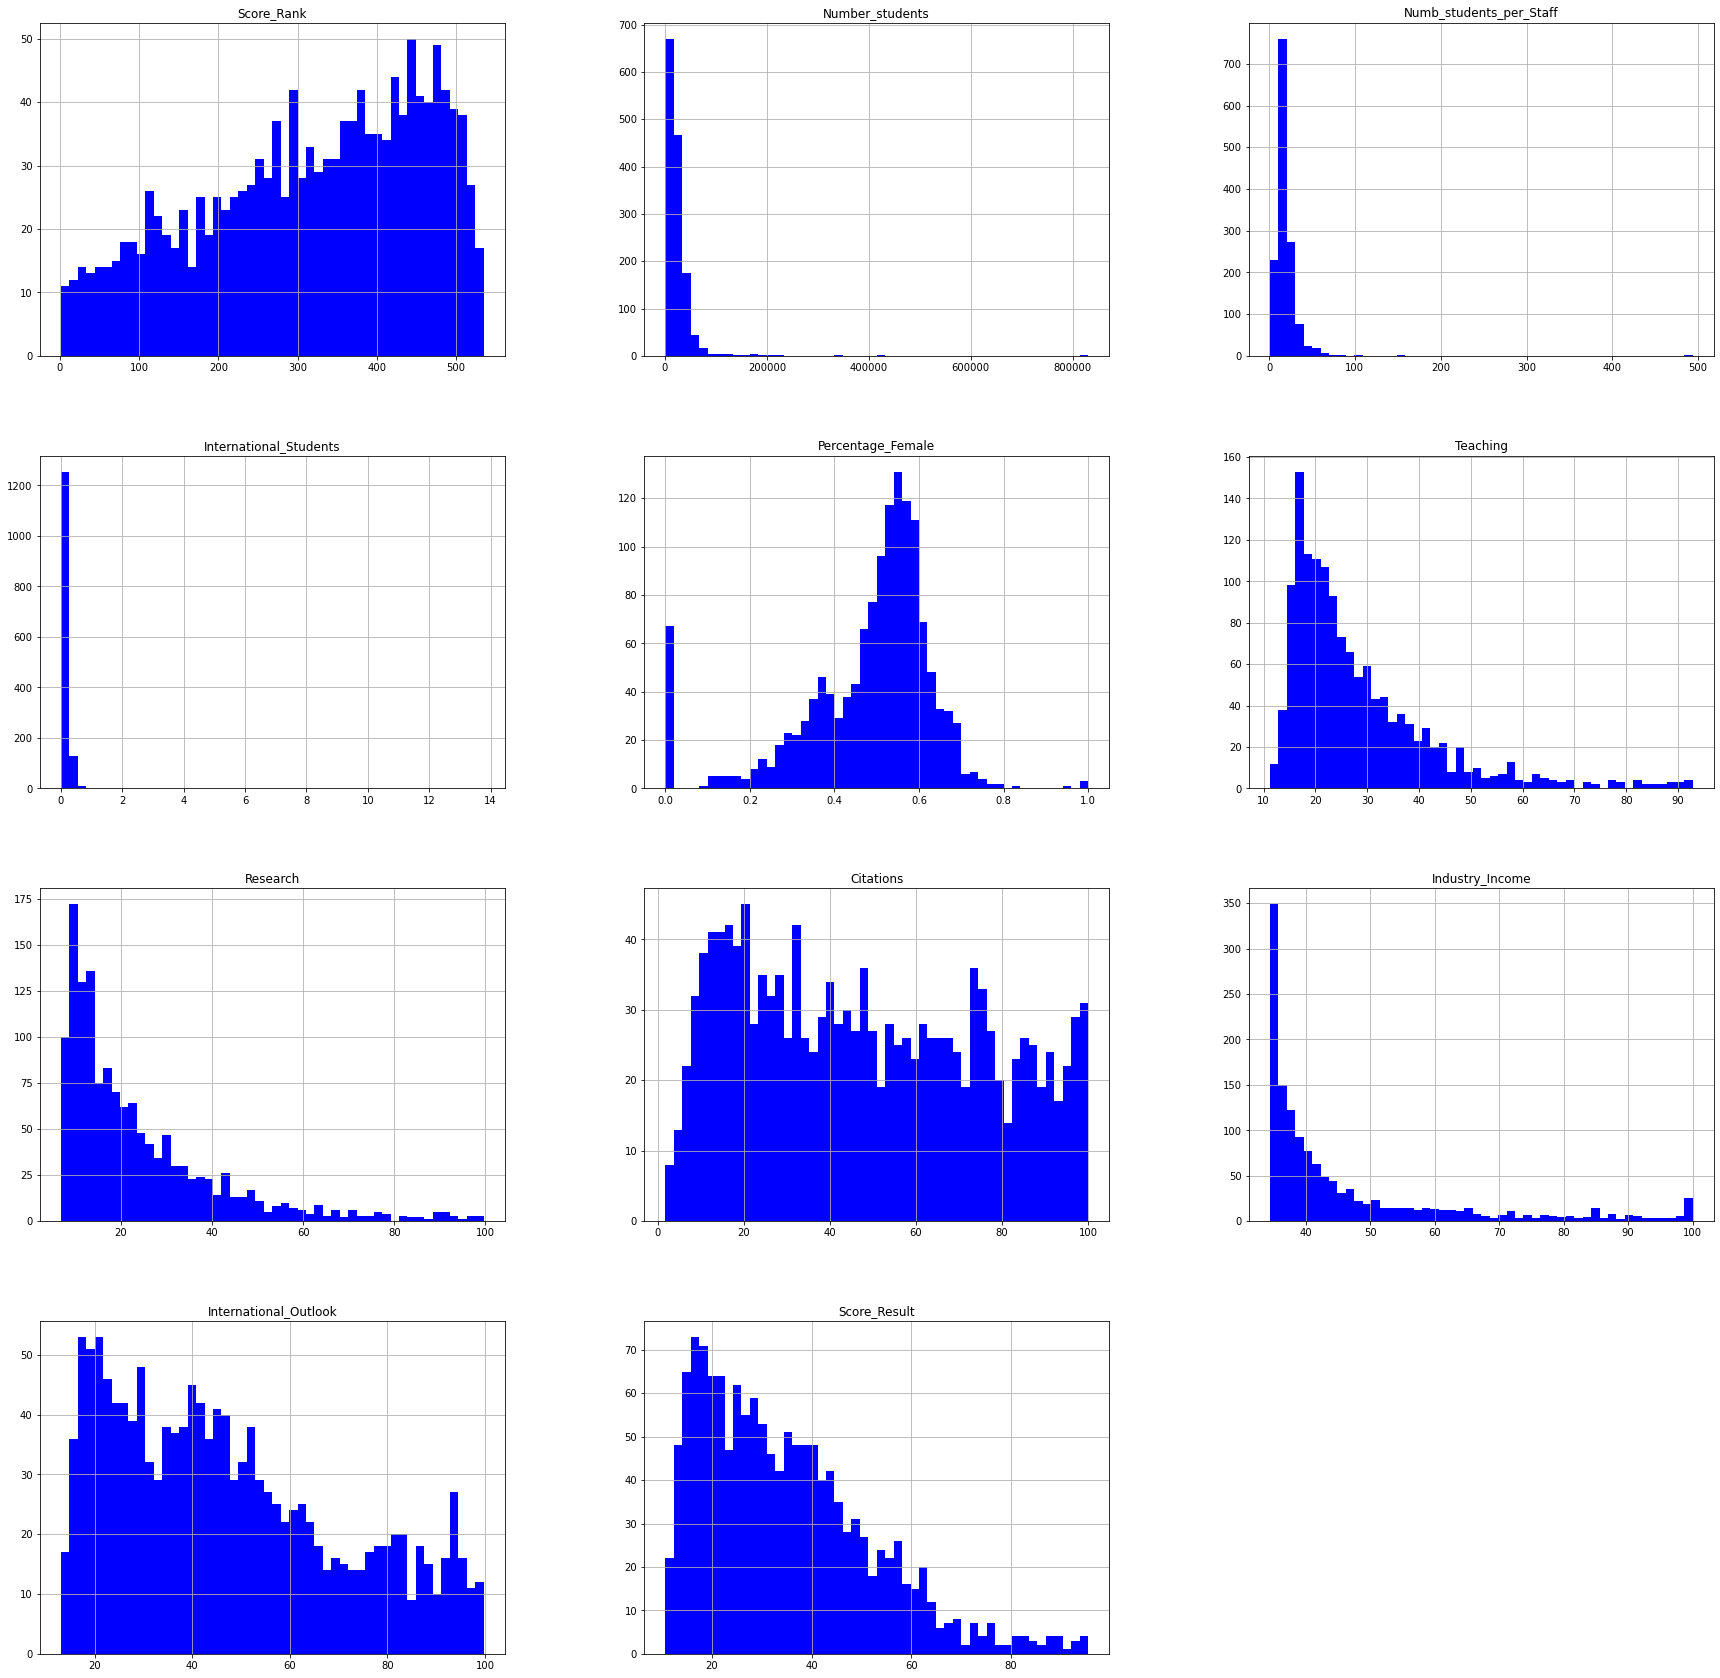

In [29]:
df.hist(bins = 50, figsize = (30, 30), color = 'b')

In [30]:
#plotting the kernal density function

In [32]:
df.columns

Index(['Score_Rank', 'Number_students', 'Numb_students_per_Staff',
       'International_Students', 'Percentage_Female', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook',
       'Score_Result'],
      dtype='object')

In [35]:
corr = df.corr()

In [ ]:
# correlation heatmap for the variables

<AxesSubplot:>

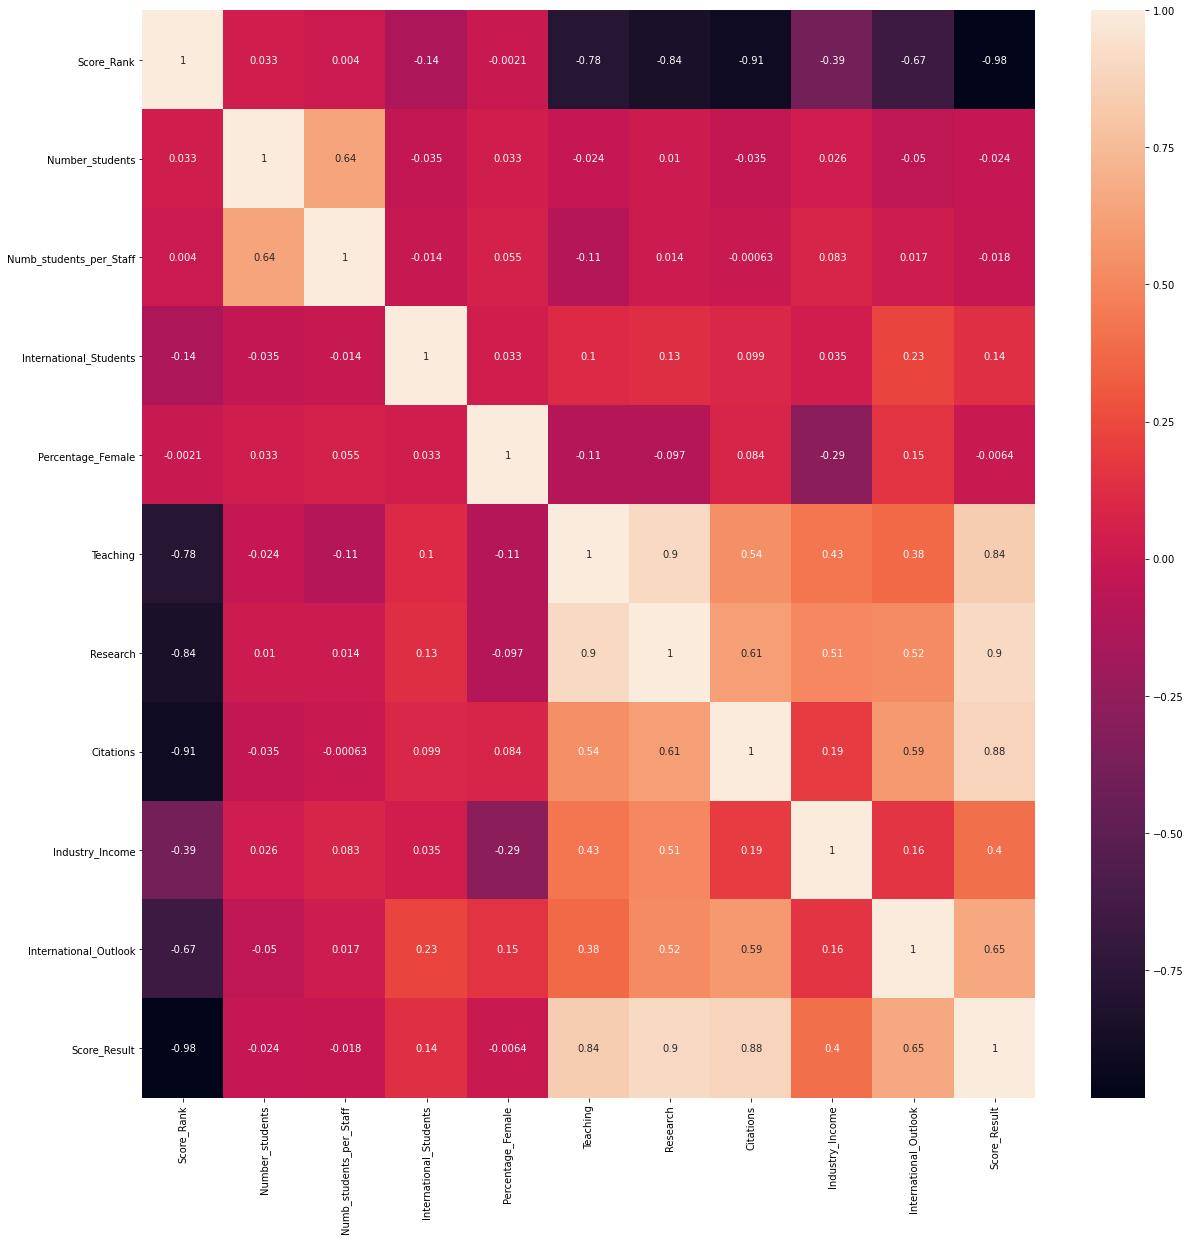

In [36]:
f, ax =plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot = True)

In [37]:
#finding optimal number of clusters

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [39]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [40]:
df_scaled 

array([[-2.23075914, -0.09322243, -0.46150648, ...,  1.16935673,
         2.11703839,  3.57768178],
       [-2.22366169, -0.65468487, -0.7467206 , ...,  2.55246826,
         1.5199691 ,  3.5245531 ],
       [-2.21656425, -0.14460246, -0.47933236, ...,  0.78823266,
         2.05690191,  3.51864991],
       ...,
       [ 1.54508271, -0.25863809, -0.46744844, ..., -0.5887317 ,
        -1.30644523, -1.39870414],
       [ 1.55218016, -0.20180312,  0.35254216, ..., -0.70552779,
        -1.2634906 , -1.40460732],
       [ 1.5592776 , -0.43999192,  0.39413588, ..., -0.42275832,
        -1.2634906 , -1.42231688]])

In [41]:
#apply elbow method with WCSS (Within Cluster Sum of Squares)

In [42]:
scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

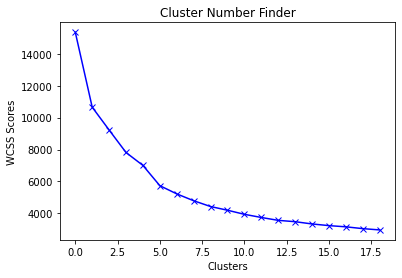

In [43]:
plt.plot(scores_1, 'bx-')
plt.title('Cluster Number Finder')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show()

In [44]:
# 4-7 is where the elbow could bend. I chose 6

In [45]:
#apply k-means clustering

In [46]:
kmeans=KMeans(6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [47]:
labels

array([1, 1, 1, ..., 3, 3, 3])

kmeans.cluster_centers_.shape

In [48]:
#df_scaled is an array. Changing it to a df named dfscaled

In [49]:
dfscaled = pd.DataFrame(df_scaled)

In [50]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns = [dfscaled.columns])

In [51]:
cluster_centers

,0,1,2,3,4,5,6,7,8,9,10
0,-0.276974,-0.214251,-0.175659,-0.005621,-1.475849,0.238273,0.316520,-0.004488,1.537039,-0.051712,0.187167
1,-1.712910,0.100875,0.045109,0.263383,-0.000415,1.894782,2.004696,1.270144,0.940342,1.048748,1.851439
2,0.934702,24.574068,28.196571,-0.295498,-0.656115,-1.076680,0.006779,-1.140210,3.290128,-1.280672,-0.879224
3,0.890653,0.037157,-0.061693,-0.196665,0.020944,-0.547648,-0.644136,-0.847087,-0.402714,-0.676785,-0.832518
4,1.474108,-0.083379,-0.176292,35.552723,0.652633,-0.836304,-0.945832,-1.457605,-0.656350,-0.911263,-1.327866
5,-0.453581,-0.080140,0.065908,0.090454,0.483454,-0.110828,-0.048345,0.681933,-0.367234,0.547042,0.339640


In [52]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,276.280000,16692.533333,16.010667,0.121267,0.238467,31.599333,29.530000,47.988667,71.481333,45.910667,37.964667
1,73.962766,27033.164894,19.726064,0.224521,0.475213,55.029787,59.125000,83.328723,61.774468,71.529787,66.157447
2,447.000000,830104.000000,493.500000,0.010000,0.370000,13.000000,24.100000,16.500000,100.000000,17.300000,19.900000
3,440.793600,24942.294400,17.928640,0.047936,0.478640,20.482880,12.688960,24.627040,39.926080,31.358720,20.691200
4,523.000000,20987.000000,16.000000,13.770000,0.580000,16.400000,7.400000,7.700000,35.800000,25.900000,12.300000
5,251.396752,21093.292343,20.076102,0.158144,0.552854,26.661485,23.133643,67.020186,40.503248,59.849884,40.547564


In [ ]:
#cluster 0 has low number of students per staff, low student enrollment, low percentage female.
#cluster 1 has moderately high ranking, low citations, high international outlook.
#cluster 2 has extremely high enrollment and staff/students, low international students, high industry income
#cluster 3 is genrally average across all features
#cluster 4 is low ranking, low staff/students, high international students, high on research and citation
#cluster 5 is also average, although in different ways than cluster 3

In [53]:
labels.shape

(1396,)

In [54]:
labels.max()

5

In [55]:
labels.min()

0

In [56]:
#add column showing the Cluster each university is in

In [57]:
df_cluster = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis = 1)

In [58]:
df_cluster

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Cluster
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4,1
1,2,2240,6.4,0.30,0.34,92.1,97.2,97.9,88.0,82.5,94.5,1
2,3,18978,10.9,0.37,0.47,91.4,98.7,95.8,59.3,95.0,94.4,1
3,4,16135,7.3,0.23,0.43,92.8,96.4,99.9,66.2,79.5,94.3,1
4,5,11247,8.6,0.34,0.39,90.5,92.4,99.5,86.9,89.0,93.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1391,531,20174,17.8,0.00,0.55,16.2,8.3,6.1,35.6,16.3,11.3,3
1392,532,34101,21.3,0.00,0.57,15.3,7.7,6.7,35.1,19.4,11.2,3
1393,533,15236,11.1,0.03,0.63,17.0,8.1,4.5,36.9,16.7,11.1,3
1394,534,17101,24.9,0.00,0.54,13.8,7.8,7.6,35.0,17.7,11.0,3


In [ ]:
#show histograms for each feature within the cluster

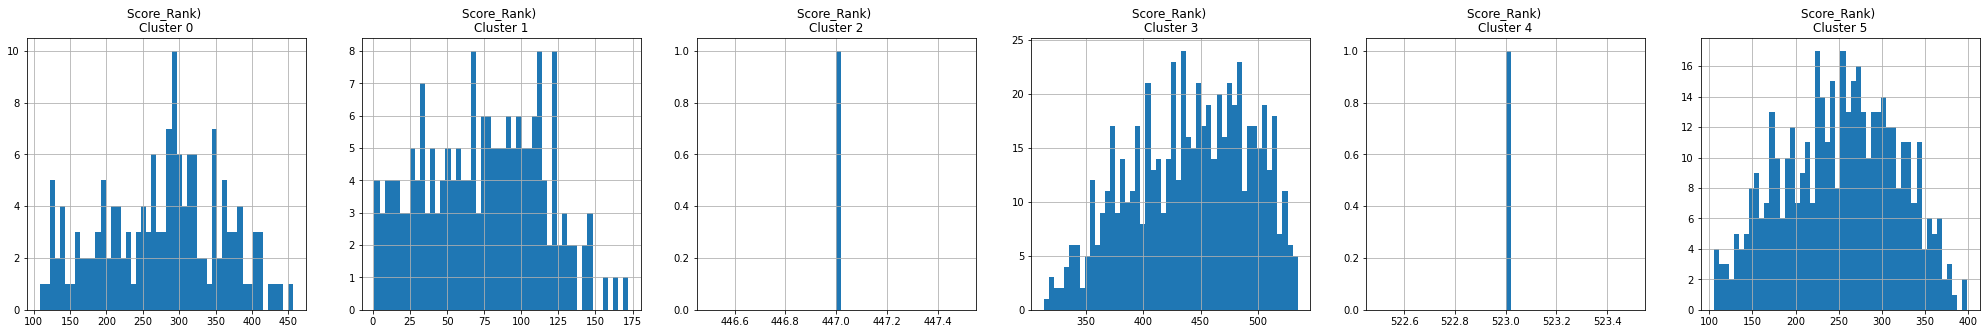

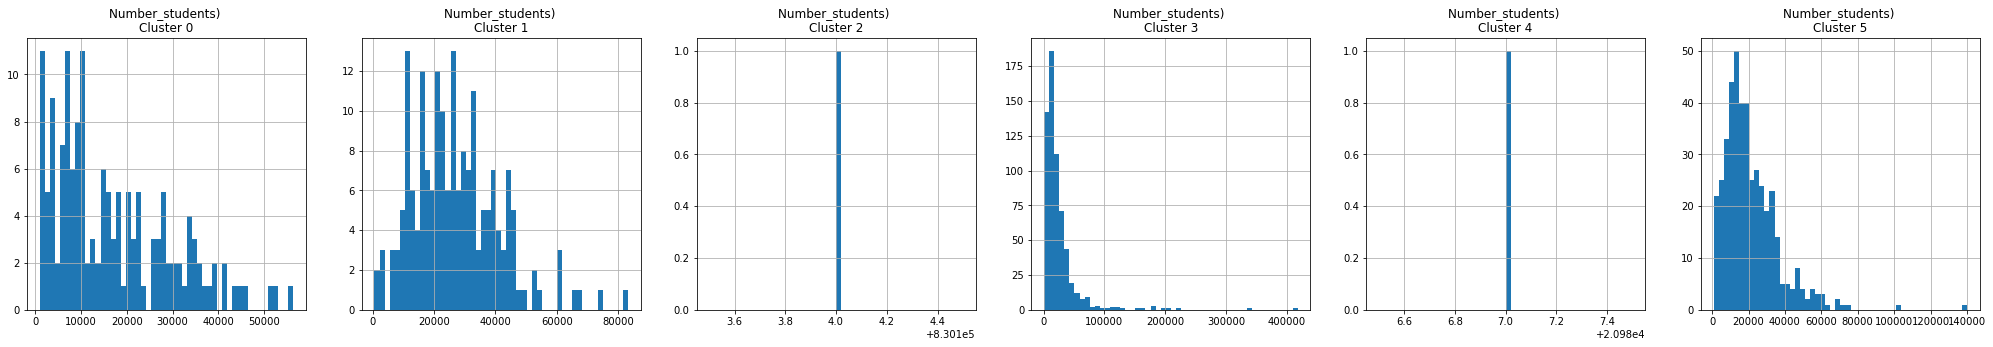

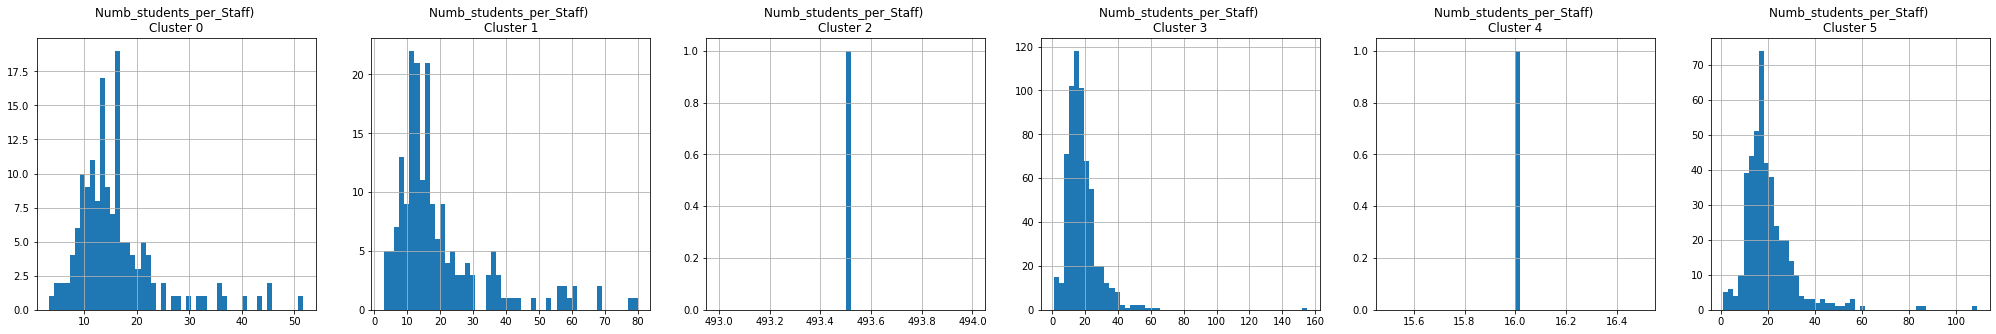

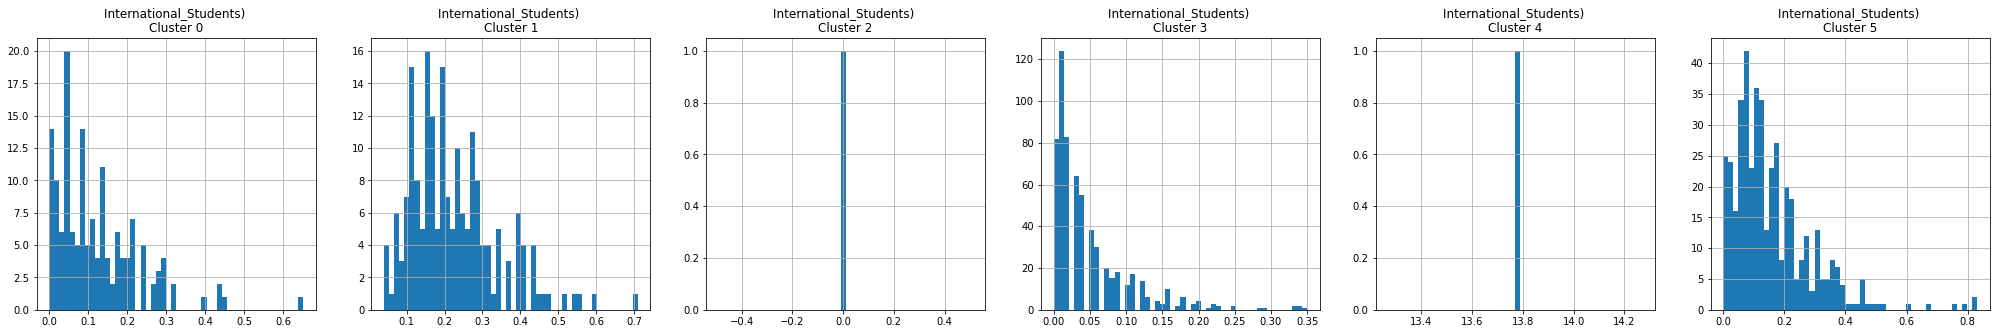

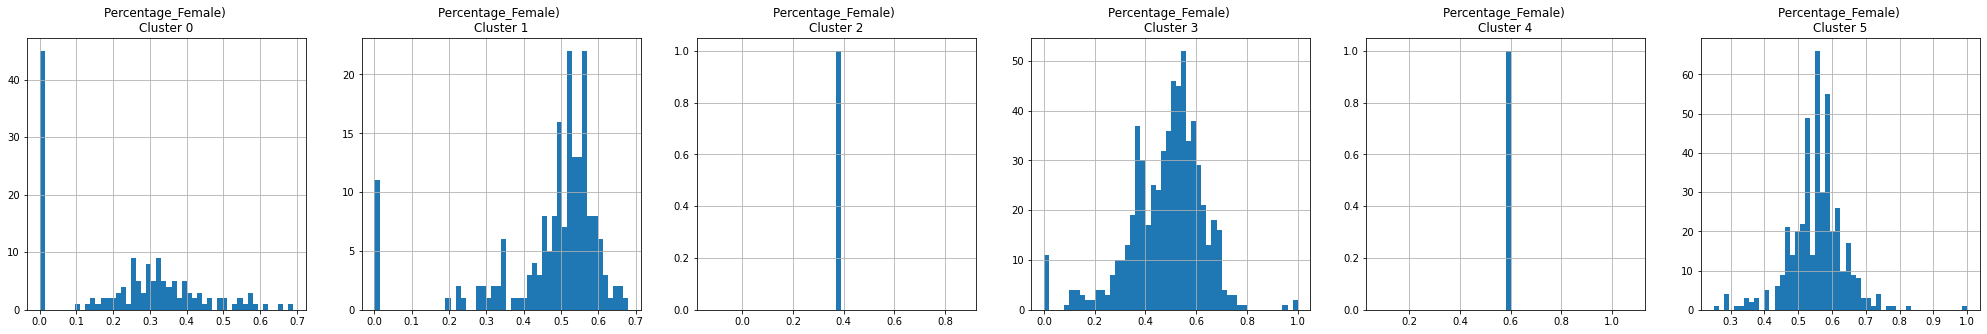

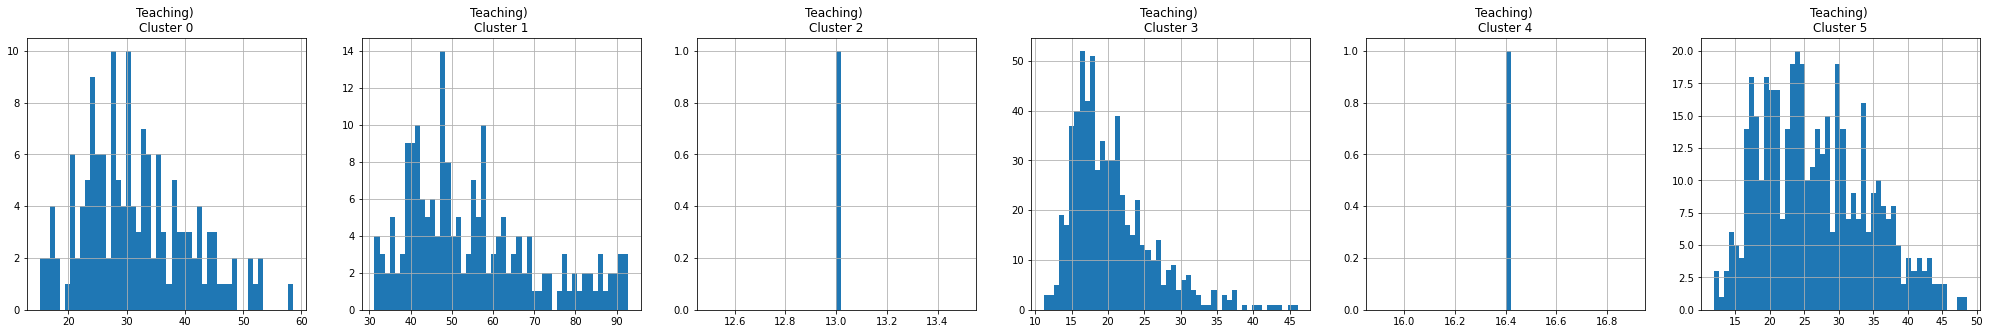

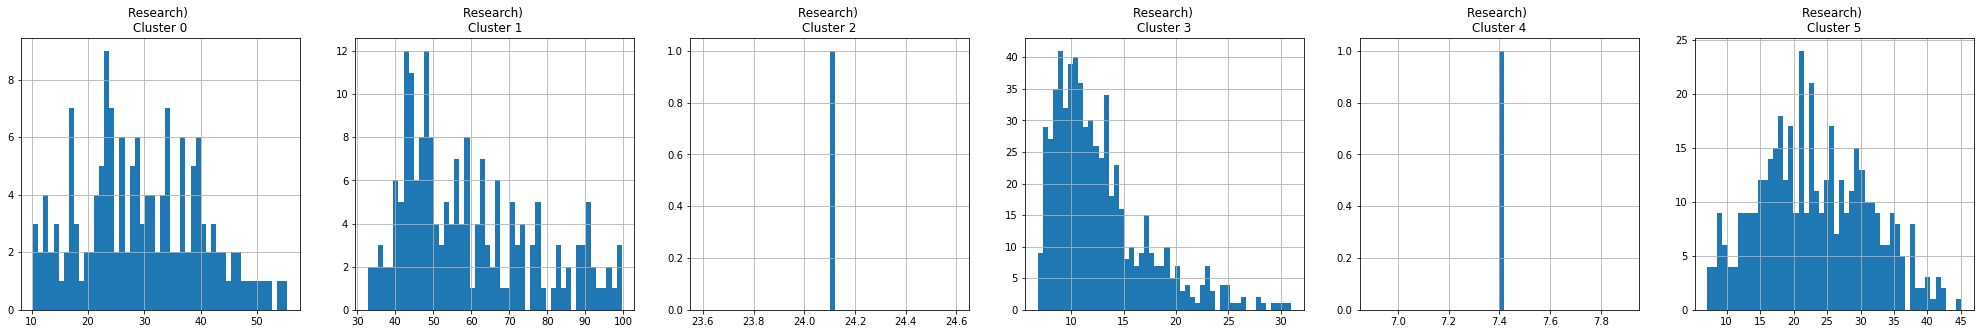

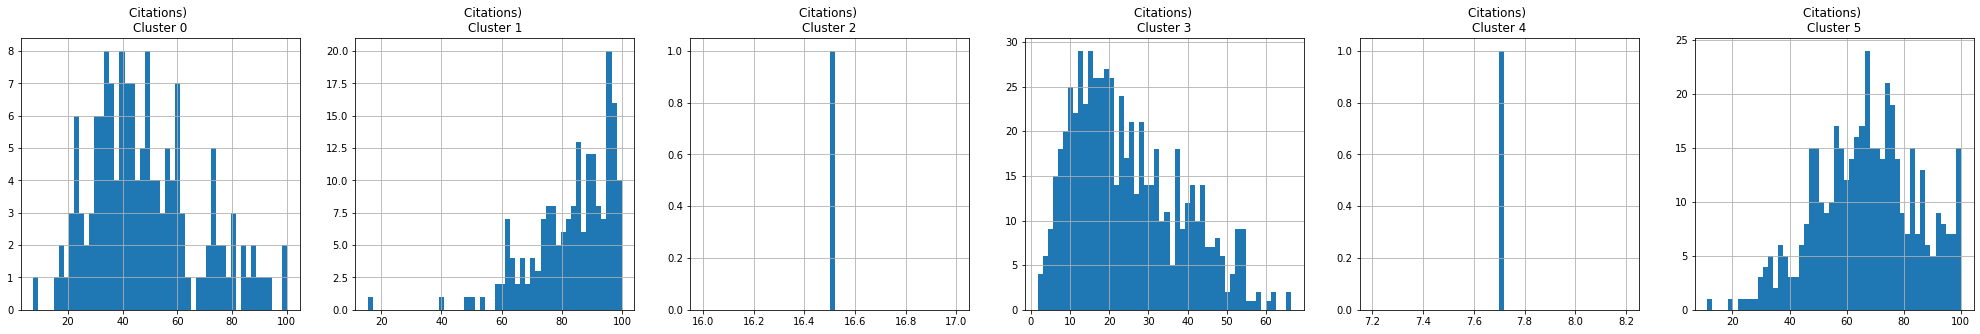

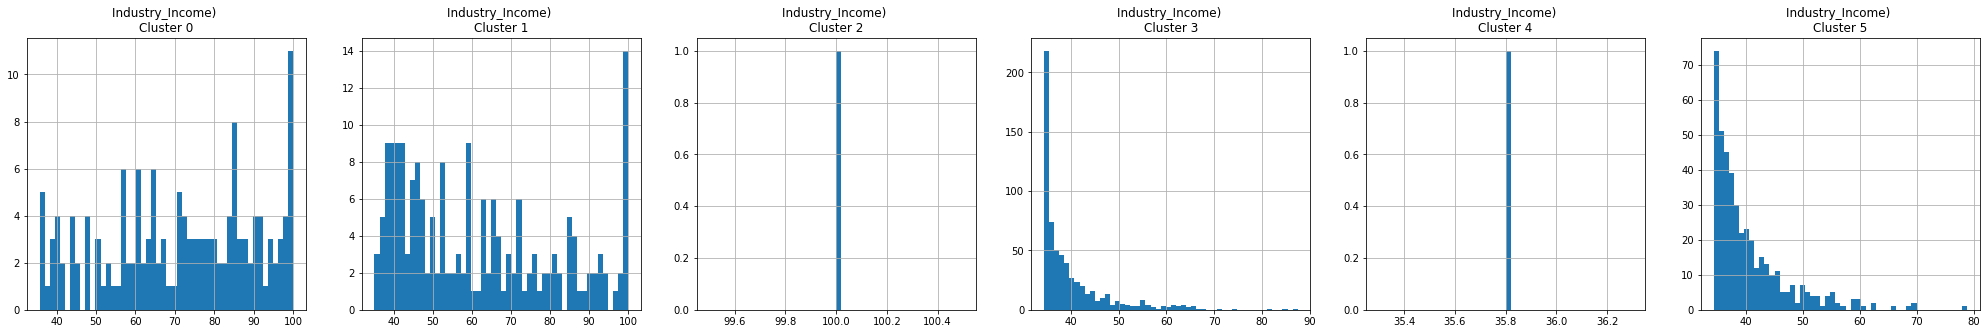

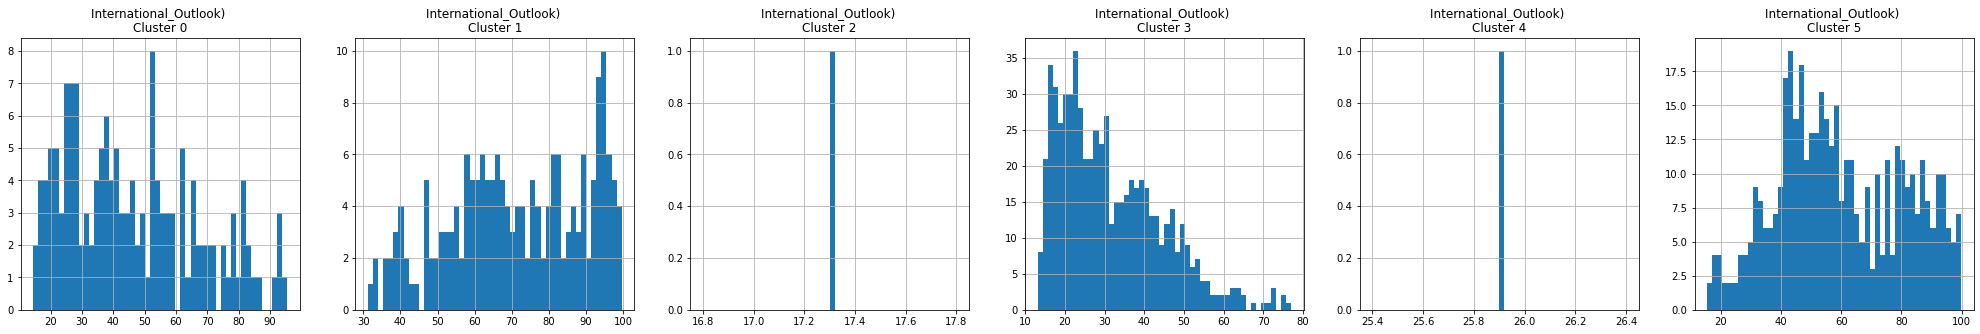

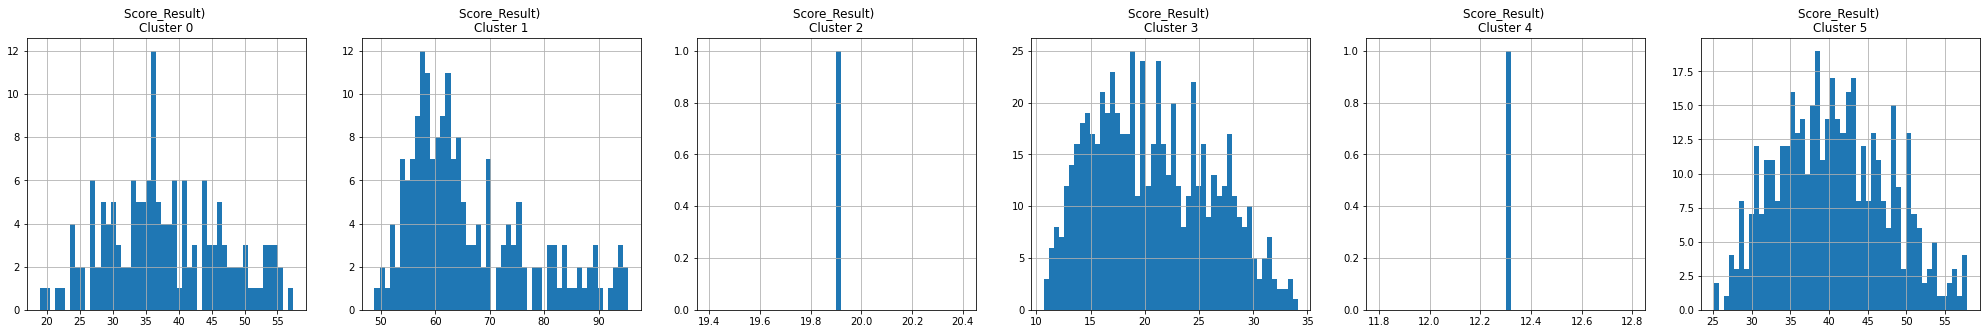

In [59]:
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(6):  
        plt.subplot(1, 6, j+1)
        cluster = df_cluster[df_cluster['Cluster'] == j]
        cluster[i].hist(bins = 50)
        plt.title('{}) \nCluster {}'.format(i,j))
        
    #plt.show

In [60]:
 #I want to reduce the features of the clusters via Principle Component Analysis

In [112]:
pca = PCA(n_components = 2)
principle_comp = pca.fit_transform(dfscaled)
principle_comp

array([[ 7.70290173, -0.324658  ],
       [ 7.77059579, -0.81352252],
       [ 7.52860113, -0.40617208],
       ...,
       [-3.12984054, -0.50992956],
       [-3.20478527,  0.0794585 ],
       [-3.087526  , -0.16019301]])

In [62]:
pca_df = pd.DataFrame(data = principle_comp, columns = ['pca1', 'pca2'])
pca_df.head(5)

,pca1,pca2
0,7.702902,-0.324658
1,7.770596,-0.813523
2,7.528601,-0.406172
3,7.425154,-0.578130
4,7.672383,-0.533046


In [63]:
#concatonate cluster labels to df

In [64]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head(5)

,pca1,pca2,cluster
0,7.702902,-0.324658,1
1,7.770596,-0.813523,1
2,7.528601,-0.406172,1
3,7.425154,-0.578130,1
4,7.672383,-0.533046,1


In [ ]:
#Visualize the clusters within the Principle Components

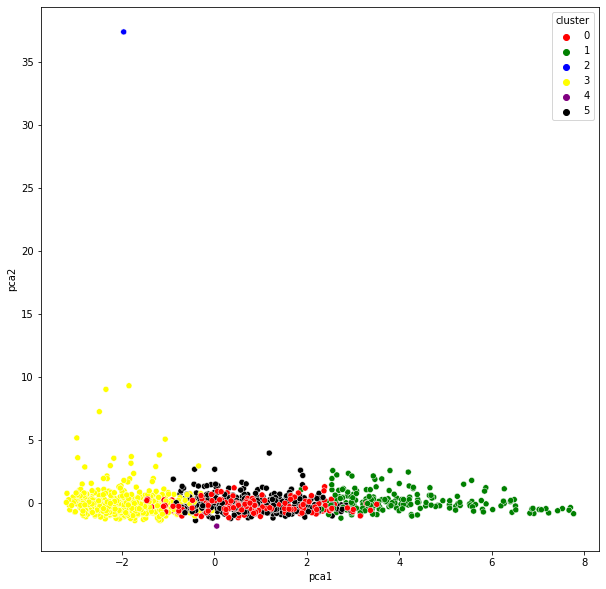

In [65]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow', 'purple', 'black'])

In [66]:
#try dimensionality reduction using autoencoders

In [71]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

Using TensorFlow backend.


In [82]:
input_df = Input(shape = (11,))

In [83]:
x = Dense(6, activation = 'relu', )(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(11, kernel_initializer = 'glorot_uniform')(x)

In [87]:
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [85]:
dfscaled.shape

(1396, 11)

In [94]:
autoencoder.fit(dfscaled, dfscaled, batch_size = 128, epochs = 25, verbose = 1)

Train on 1396 samples
Epoch 1/25
1396/1396 [==============================] - 2s 2ms/sample - loss: 0.8081 1s - loss: 
Epoch 2/25
1396/1396 [==============================] - 1s 882us/sample - loss: 0.5618
Epoch 3/25
1396/1396 [==============================] - 1s 712us/sample - loss: 0.4235
Epoch 4/25
1396/1396 [==============================] - 1s 576us/sample - loss: 0.3532
Epoch 5/25
1396/1396 [==============================] - 1s 549us/sample - loss: 0.3495
Epoch 6/25
1396/1396 [==============================] - 1s 507us/sample - loss: 0.3571s - loss:
Epoch 7/25
1396/1396 [==============================] - 1s 455us/sample - loss: 0.2661
Epoch 8/25
1396/1396 [==============================] - 1s 442us/sample - loss: 0.2233
Epoch 9/25
1396/1396 [==============================] - 1s 526us/sample - loss: 0.2266
Epoch 10/25
1396/1396 [==============================] - 1s 443us/sample - loss: 0.2193
Epoch 11/25
1396/1396 [==============================] - 1s 459us/sample - loss: 0.2631


In [96]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 500)               3500      
_________________________________________________________________
dense_35 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_36 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_37 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_38 (Dense)             (None, 2000)              2200

In [97]:
pred = encoder.predict(dfscaled)

In [99]:
pred.shape

(1396, 10)

In [ ]:
#find optimal number of clusters via elbow method(WCSS)

In [100]:
scores_2 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dfscaled)
    scores_2.append(kmeans.inertia_)

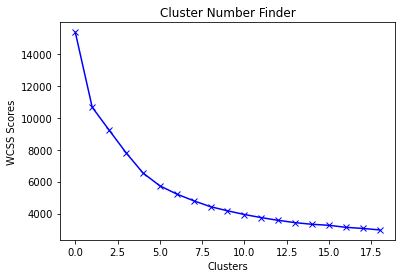

In [101]:
plt.plot(scores_2, 'bx-')
plt.title('Cluster Number Finder')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show()

In [ ]:
#elbow seems to bend at 5

In [ ]:
#plot elbow charts together

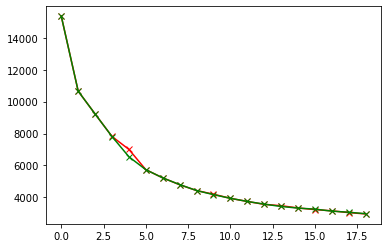

In [102]:
plt.plot(scores_1, 'bx-', color = 'r') 
plt.plot(scores_2, 'bx-', color = 'g') 

In [ ]:
#they are almost the same,excepting for point 4

In [105]:
kmeans=KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [106]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis = 1)
df_cluster_dr.head()

,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking,Cluster
0,1,University of Oxford,United Kingdom,20664,11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.4,2
1,2,California Institute of Technology,United States,2240,6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.5,2
2,3,University of Cambridge,United Kingdom,18978,10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.4,2
3,4,Stanford University,United States,16135,7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.3,2
4,5,Massachusetts Institute of Technology,United States,11247,8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.6,2


In [ ]:
#Applying PCA

In [107]:
pca = PCA(n_components =2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['PCA1', 'PCA2'])

In [109]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,PCA1,PCA2,cluster
0,7.214832,-1.025486,2
1,7.302261,-1.356481,2
2,6.795794,-1.118686,2
3,6.354340,-1.517387,2
4,7.343832,-1.146819,2


In [ ]:
#visualize the new clusters on the PCA chart

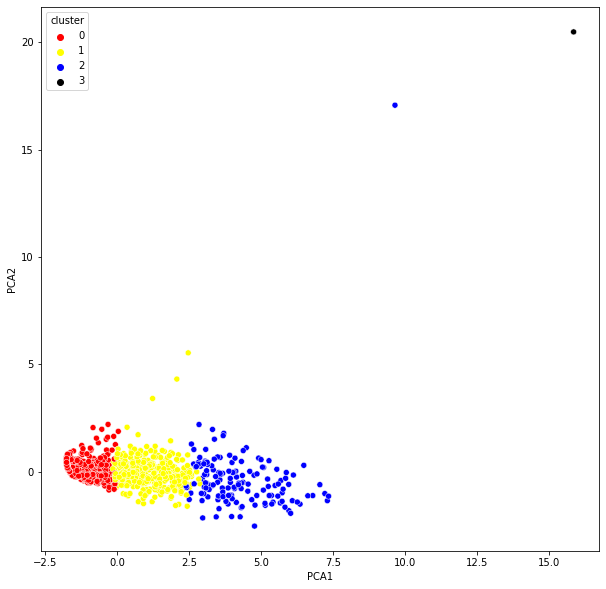

In [111]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette = ['red', 'yellow', 'blue', 'black'])